In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

# Loading in the data

In [93]:
data = pd.read_csv("Resources/heart_data.csv")
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [94]:
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB
None
(4240, 1

# Finding missing data

In [95]:
missing_data = data.isnull().sum()
print(missing_data)

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [96]:
# percentage of missing data 
missing_data_prct = (missing_data.sum()/data.shape[0])*100
print(missing_data_prct)

15.212264150943398


In [97]:
print(f'The total percentage of missing data is {round(missing_data_prct, 2)}%')

The total percentage of missing data is 15.21%


In [98]:
# sorting the percentage of missing data by category
missing_by_cat = data.isnull().sum().sort_values(ascending=False)
percent_missing_cat = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100
print(missing_by_cat)
print(percent_missing_cat)

glucose            388
education          105
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
TenYearCHD           0
diaBP                0
sysBP                0
diabetes             0
prevalentHyp         0
prevalentStroke      0
currentSmoker        0
age                  0
male                 0
dtype: int64
glucose            9.150943
education          2.476415
BPMeds             1.250000
totChol            1.179245
cigsPerDay         0.683962
BMI                0.448113
heartRate          0.023585
TenYearCHD         0.000000
diaBP              0.000000
sysBP              0.000000
diabetes           0.000000
prevalentHyp       0.000000
prevalentStroke    0.000000
currentSmoker      0.000000
age                0.000000
male               0.000000
dtype: float64


In [99]:
missing_data = pd.concat([missing_by_cat, percent_missing_cat], axis = 1, keys=["# Missing", "Percentage"])
missing_data[missing_data["# Missing"]>0]

,# Missing,Percentage
glucose,388,9.150943
education,105,2.476415
BPMeds,53,1.250000
totChol,50,1.179245
cigsPerDay,29,0.683962
BMI,19,0.448113
heartRate,1,0.023585


In [100]:
data.dropna(axis=0, inplace = True)
data.shape

(3658, 16)

In [101]:
data.info

<bound method DataFrame.info of       male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4237     0   52        2.0              0         0.0     0.0   
4238     1   40        3.0              0         0.0     0.0   
4239     0   39        3.0              1        30.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0        

# Checking the number of positive TenYearCHD results to total

In [102]:
import seaborn as sns

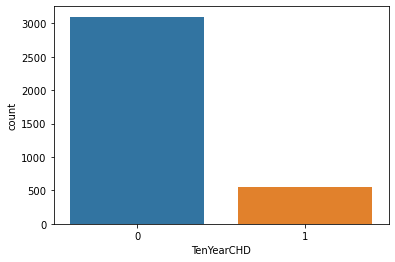

In [103]:
sns.countplot(x="TenYearCHD", data = data)

# Plot correlation to see if colunms can be dropped

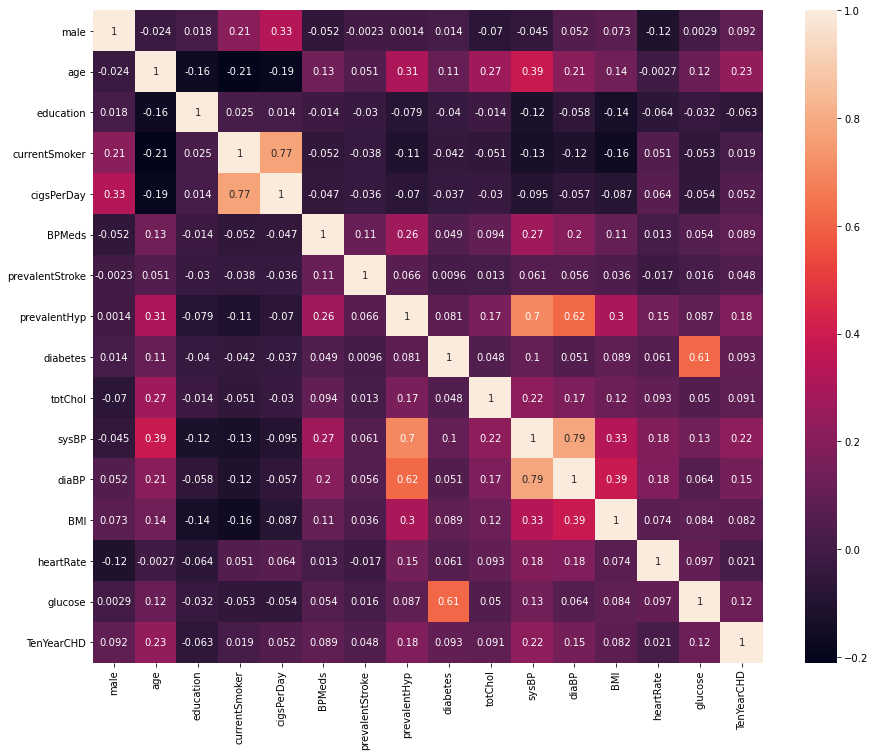

In [104]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [105]:
print(data.shape)

(3658, 16)


In [106]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# Drop columns with high correlation with another column that has a higher corealation to TenYearCHD.

In [107]:
#drop extra columns
data2 = data.drop(["currentSmoker", "prevalentHyp", "diabetes", "diaBP"], axis = 1)
data2.head()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0.0,0.0,0,195.0,106.0,26.97,80.0,77.0,0
1,0,46,2.0,0.0,0.0,0,250.0,121.0,28.73,95.0,76.0,0
2,1,48,1.0,20.0,0.0,0,245.0,127.5,25.34,75.0,70.0,0
3,0,61,3.0,30.0,0.0,0,225.0,150.0,28.58,65.0,103.0,1
4,0,46,3.0,23.0,0.0,0,285.0,130.0,23.10,85.0,85.0,0


# Upscale postive TenYearCHD data to equal negative to ensure random data includes enough positive samples

In [108]:
# upsample minority for Having_Claim:
Having_HeartFail = data2[data2.TenYearCHD==1] # Minority Class
No_HeartFail = data2[data2.TenYearCHD==0] # Majority Class
ResampleFailRate = resample(Having_HeartFail,replace=True, # sample with replacement
                              n_samples=len(No_HeartFail), # match number in majority class
                              random_state=42) # reproducible results

# combine majority and upsampled minority
UpsampledHeartFail = pd.concat([No_HeartFail,ResampleFailRate])
UpsampledHeartFail.reset_index(drop=True,inplace=True)
print(UpsampledHeartFail.TenYearCHD.value_counts().sort_values(ascending=False))


0    3101
1    3101
Name: TenYearCHD, dtype: int64


In [109]:
print(UpsampledHeartFail)

      male  age  education  cigsPerDay  BPMeds  prevalentStroke  totChol  \
0        1   39        4.0         0.0     0.0                0    195.0   
1        0   46        2.0         0.0     0.0                0    250.0   
2        1   48        1.0        20.0     0.0                0    245.0   
3        0   46        3.0        23.0     0.0                0    285.0   
4        0   43        2.0         0.0     0.0                0    228.0   
...    ...  ...        ...         ...     ...              ...      ...   
6197     1   60        1.0        10.0     0.0                0    217.0   
6198     0   62        3.0         0.0     0.0                0    312.0   
6199     1   64        2.0         0.0     0.0                0    210.0   
6200     1   48        2.0        20.0     0.0                0    230.0   
6201     1   47        2.0        20.0     0.0                0    296.0   

      sysBP    BMI  heartRate  glucose  TenYearCHD  
0     106.0  26.97       80.0     

In [110]:
X = UpsampledHeartFail.iloc[:, 0:11]
y = UpsampledHeartFail.iloc[:,11]

In [111]:
print(X)

      male  age  education  cigsPerDay  BPMeds  prevalentStroke  totChol  \
0        1   39        4.0         0.0     0.0                0    195.0   
1        0   46        2.0         0.0     0.0                0    250.0   
2        1   48        1.0        20.0     0.0                0    245.0   
3        0   46        3.0        23.0     0.0                0    285.0   
4        0   43        2.0         0.0     0.0                0    228.0   
...    ...  ...        ...         ...     ...              ...      ...   
6197     1   60        1.0        10.0     0.0                0    217.0   
6198     0   62        3.0         0.0     0.0                0    312.0   
6199     1   64        2.0         0.0     0.0                0    210.0   
6200     1   48        2.0        20.0     0.0                0    230.0   
6201     1   47        2.0        20.0     0.0                0    296.0   

      sysBP    BMI  heartRate  glucose  
0     106.0  26.97       80.0     77.0  
1    

In [112]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
6197    1
6198    1
6199    1
6200    1
6201    1
Name: TenYearCHD, Length: 6202, dtype: int64


In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# LOGISTIC REGRESSION

In [114]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [115]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [116]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.645237583315416
Testing Data Score: 0.6395873629916183


In [117]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 1 1 0 0 1 1 0 0 1]
First 10 Actual labels: [0, 1, 1, 1, 1, 1, 1, 0, 0, 1]


# DECISION TREE

In [118]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9116698903932946

# RANDOM FOREST CLASSIFIER

In [119]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9645390070921985

In [120]:
feature_names = UpsampledHeartFail.columns
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.17583217280471117, 'sysBP'),
 (0.1639483030980631, 'age'),
 (0.14927171784152535, 'totChol'),
 (0.13626562164520253, 'BMI'),
 (0.12401950279581862, 'glucose'),
 (0.11116127952744809, 'heartRate'),
 (0.06487744481721203, 'cigsPerDay'),
 (0.03602179050611173, 'education'),
 (0.029237084958350836, 'male'),
 (0.007617522733488965, 'BPMeds'),
 (0.0017475592720677278, 'prevalentStroke')]

In [121]:
predicted_values = rf.predict(X_test)

In [122]:
# copy_df = UpsampledHeartFail.copy()
df_copy = pd.DataFrame()

In [123]:
df_copy["y"] = y_test

In [124]:
df_copy["y_predicted_value"] = predicted_values

In [125]:
df_copy

,y,y_predicted_value
1050,0,0
3801,1,1
5268,1,1
3378,1,1
3582,1,1
...,...,...
3960,1,1
3224,1,1
3821,1,1
933,0,0


# STANDARD SCALER

In [126]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [127]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.923
k: 3, Train/Test Score: 0.925/0.858
k: 5, Train/Test Score: 0.869/0.797
k: 7, Train/Test Score: 0.820/0.763
k: 9, Train/Test Score: 0.791/0.754
k: 11, Train/Test Score: 0.771/0.738
k: 13, Train/Test Score: 0.757/0.725
k: 15, Train/Test Score: 0.757/0.727
k: 17, Train/Test Score: 0.745/0.716
k: 19, Train/Test Score: 0.748/0.710


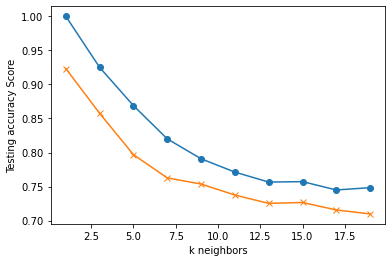

In [128]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [129]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.725


# SUPPORT VECTOR CLASSIFIER

In [130]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [131]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.695


In [132]:
# Calculate classification report
from sklearn.metrics import classification_report
target_names = ["negative", "positive"]
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    negative       0.69      0.69      0.69       771
    positive       0.70      0.70      0.70       780

    accuracy                           0.70      1551
   macro avg       0.70      0.70      0.70      1551
weighted avg       0.70      0.70      0.70      1551



# Save the Trained Model

In [133]:
import joblib

In [140]:
filename = 'web_pg/static/models/prediction_model.sav'
joblib.dump(clf, filename)

['web_pg/static/models/prediction_model.sav']

In [135]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense

ModuleNotFoundError: No module named 'tensorflow'

In [138]:
model.save("predict_heart_disease.h5")

AttributeError: 'SVC' object has no attribute 'save'

# Evaluate the Model

In [137]:
saved_model = joblib.load('prediction_model.sav')

In [ ]:
saved_model.predict()

In [ ]:
# Load the model
from tensorflow.keras.models import load_model
model = load_model("predict_heart_disease.h5")

In [ ]:
# Evaluate the model using the training data
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
 # Grab just one data point to test with
test = np.expand_dims(X_test[0], axis=0)
test.shape

In [ ]:
# Make a prediction
print(f"Predicted class: {model.predict_classes(test)}")